# Dominik Sawicki, 145402
# Sebastian Szczepaniak, 145280

# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

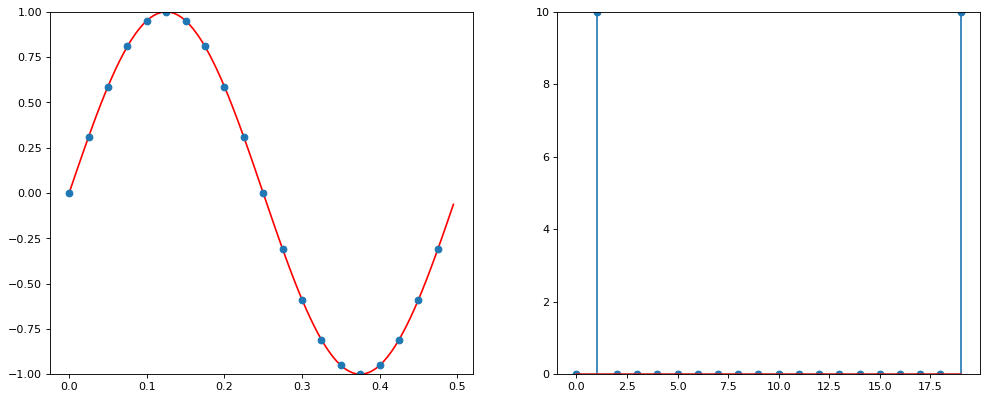

In [1]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*np.sin(2*np.pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = np.fft.fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = np.abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [2]:
# Zdefiniuj funckję
def draw_function(A=1, f=2, w=40, LP=1):
    T = 1/f
    TW = 1/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    
    FUNC = lambda t: A*np.sin(2*np.pi*t*f)
    
    signal = FUNC(t)
    signal_f = np.abs(np.fft.fft(signal))
    freqs = range(int(n))
    
    base_t = np.arange(0, LP*T, 1/200)
    base_signal = FUNC(base_t)
    
    plt.figure(figsize=(15, 6), dpi=80)
    
    plt.subplot(1, 2, 1)
    plt.plot(base_t, base_signal, linestyle='-', color='red')
    plt.plot(t, signal, 'o')
    plt.ylim([min(base_signal), max(base_signal)])
    
    plt.subplot(1, 2, 2)
    plt.stem(freqs, signal_f, '-*')
    plt.ylim([0, max(3, max(signal_f))])
    
    plt.show()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [4]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = np.linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

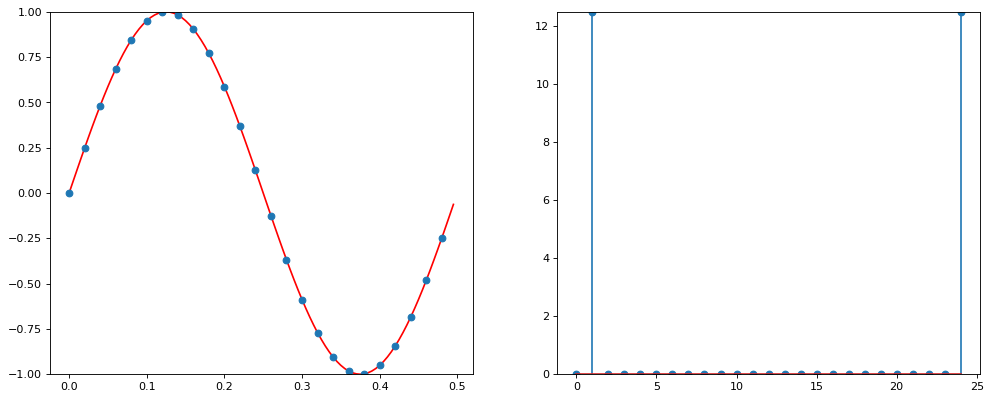

In [5]:
# w=50
draw_function(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [7]:
# popraw oś OX
def draw_function(A=1, f=2, w=40, LP=1):
    T = 1/f
    TW = 1/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    
    FUNC = lambda t: A*np.sin(2*np.pi*t*f)
    
    signal = FUNC(t)
    signal_f = np.abs(np.fft.fft(signal))
    freqs = np.linspace(0, w, n)  # changed from range(int(n))
    
    base_t = np.arange(0, LP*T, 1/200)
    base_signal = FUNC(base_t)
    
    plt.figure(figsize=(15, 6), dpi=80)
    
    plt.subplot(1, 2, 1)
    plt.plot(base_t, base_signal, linestyle='-', color='red')
    plt.plot(t, signal, 'o')
    plt.ylim([min(base_signal), max(base_signal)])
    
    plt.subplot(1, 2, 2)
    plt.stem(freqs, signal_f, '-*')
    plt.ylim([0, max(3, max(signal_f))])
    
    plt.show()

    
interact(draw_function, w=(10, 100, 5), LP=(1, 5, 1))

interactive(children=(IntSlider(value=1, description='A', max=3, min=-1), IntSlider(value=2, description='f', …

<function __main__.draw_function(A=1, f=2, w=40, LP=1)>

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

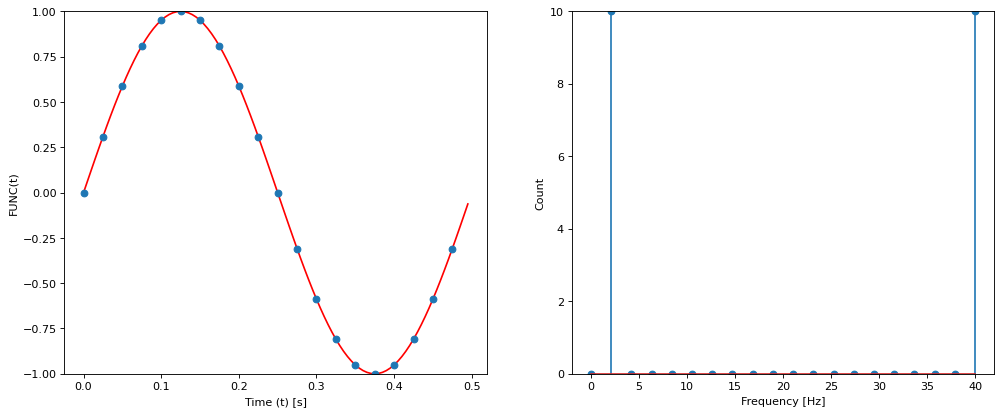

In [8]:
# Podpisz osie wykresów
def draw_function(A=1, f=2, w=40, LP=1):
    T = 1/f
    TW = 1/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    
    FUNC = lambda t: A*np.sin(2*np.pi*t*f)
    
    signal = FUNC(t)
    signal_f = np.abs(np.fft.fft(signal))
    freqs = np.linspace(0, w, n)
    
    base_t = np.arange(0, LP*T, 1/200)
    base_signal = FUNC(base_t)
    
    plt.figure(figsize=(15, 6), dpi=80)
    
    plt.subplot(1, 2, 1)
    plt.plot(base_t, base_signal, linestyle='-', color='red')
    plt.plot(t, signal, 'o')
    plt.ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Time (t) [s]')  # added
    plt.ylabel('FUNC(t)')  # added
    
    plt.subplot(1, 2, 2)
    plt.stem(freqs, signal_f, '-*')
    plt.ylim([0, max(3, max(signal_f))])
    plt.ylabel('Count')  # added
    plt.xlabel('Frequency [Hz]')  # added
    
    plt.show()


draw_function()

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

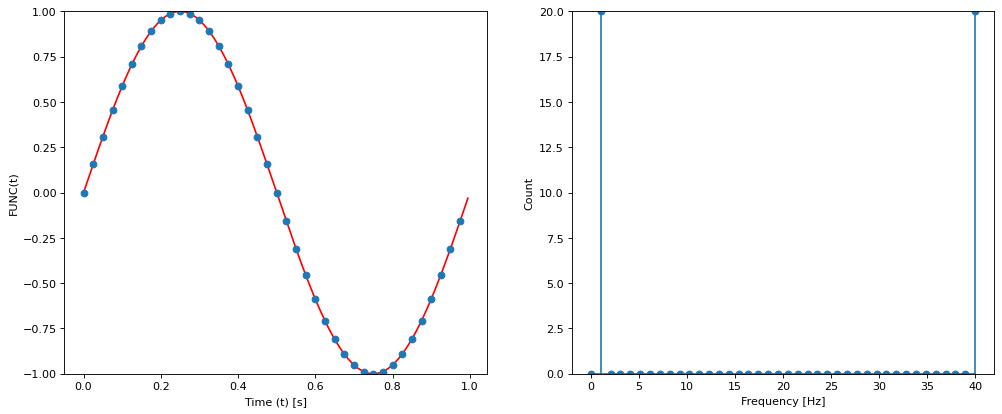

In [9]:
# f=1, A=1, LP=1
draw_function(f=1, A=1, LP=1)

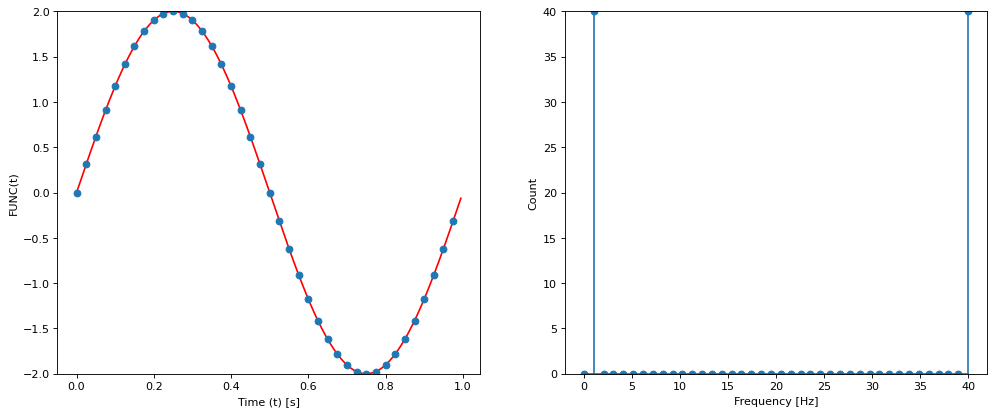

In [10]:
# f=1, A=2, LP=1
draw_function(f=1, A=2, LP=1)

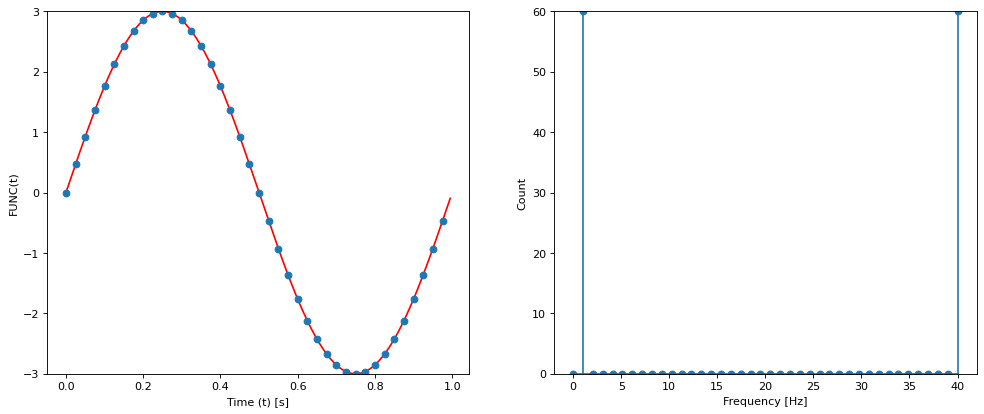

In [11]:
# f=1, A=3, LP=1
draw_function(f=1, A=3, LP=1)

##### Oś OY na wykresie spektrum jest wprost proporcjonalna do amplitudy

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

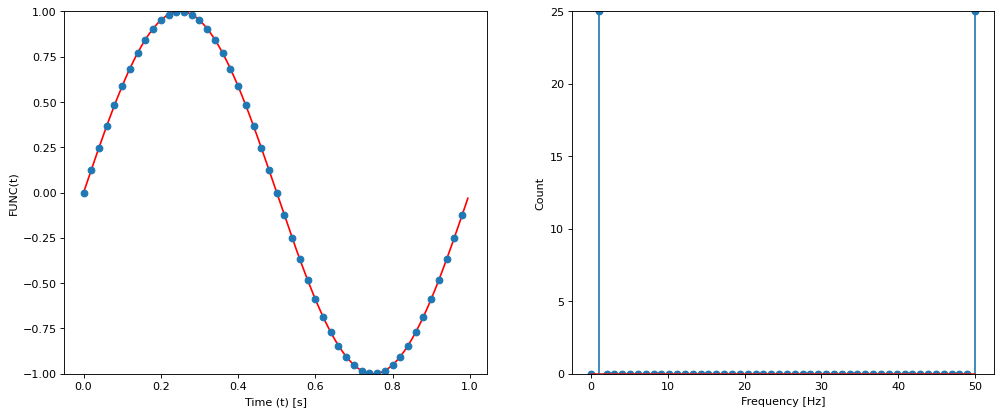

In [12]:
# f=1, w=50, LP=1
draw_function(f=1, w=50, LP=1)

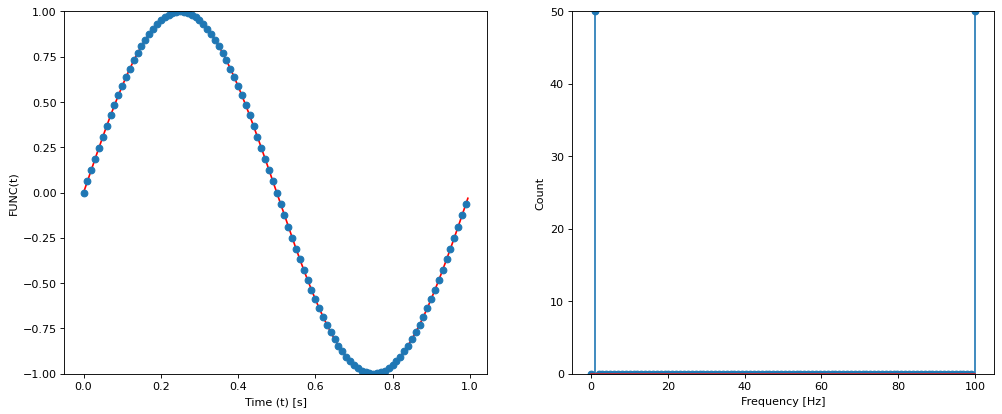

In [13]:
# f=1, w=100, LP=1
draw_function(f=1, w=100, LP=1)

##### Dla pierwszego wykresu jest 50 punktów, dla drugiego 100. Maksymalne wartości na osi OY są zależne nie tylko od amplitudy, ale również od częstotliwości próbkowania.

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [15]:
# popraw oś OY
def draw_function(A=1, f=2, w=40, LP=1):
    T = 1/f
    TW = 1/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    
    FUNC = lambda t: A*np.sin(2*np.pi*t*f)
    
    signal = FUNC(t)
    signal_f = np.abs(np.fft.fft(signal))/(n/2)  # changed from np.abs(np.fft.fft(signal))
    freqs = np.linspace(0, w, n)
    
    base_t = np.arange(0, LP*T, 1/200)
    base_signal = FUNC(base_t)
    
    plt.figure(figsize=(15, 6), dpi=80)
    
    plt.subplot(1, 2, 1)
    plt.plot(base_t, base_signal, linestyle='-', color='red')
    plt.plot(t, signal, 'o')
    plt.ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Time (t) [s]')
    plt.ylabel('FUNC(t)')
    
    plt.subplot(1, 2, 2)
    plt.stem(freqs, signal_f, '-*')
    plt.ylim([0, max(3, max(signal_f))])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
    
    plt.show()


interact(draw_function, A=(1, 10, 1))

interactive(children=(IntSlider(value=1, description='A', max=10, min=1), IntSlider(value=2, description='f', …

<function __main__.draw_function(A=1, f=2, w=40, LP=1)>

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

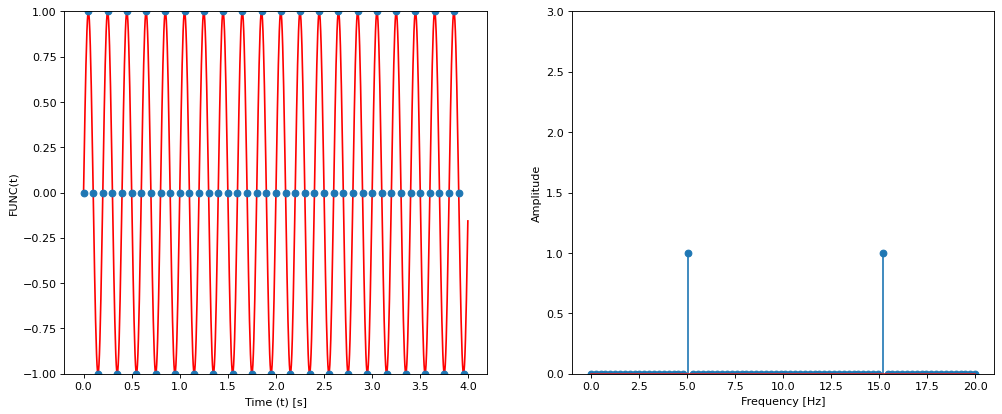

In [16]:
# f=5, w=20, LP=20
draw_function(f=5, w=20, LP=20)

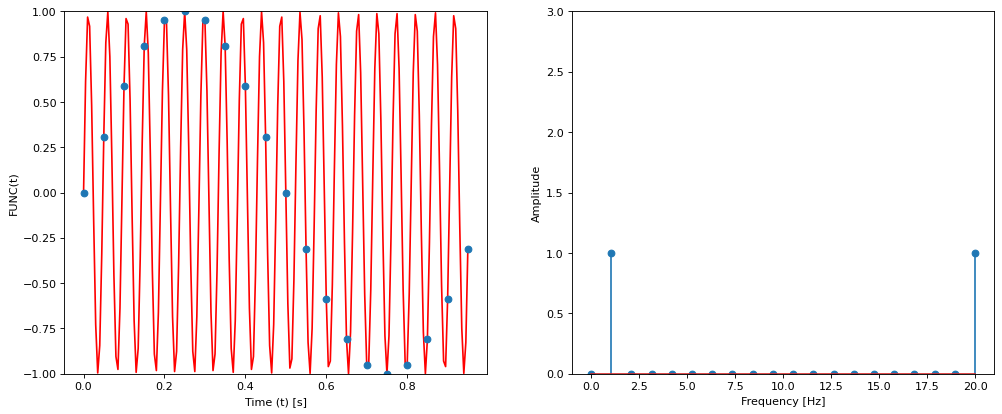

In [17]:
# f=21, w=20, LP=20
draw_function(f=21, w=20, LP=20)

##### Z uwagi na niską częstotliwość próbkowania w porównaniu do częstotliwości funkcji sinusoidalnej, spróbkowane wykresy słabo przedstawiają bazową funkcję.  
##### Dla drugiego przypadku uzyskano częstotliwość 20Hz, ponieważ dla powyższych danych wykres spróbkowanej funkcji wygląda jak wykres funkcji sinus dla innej częstotliwości.

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

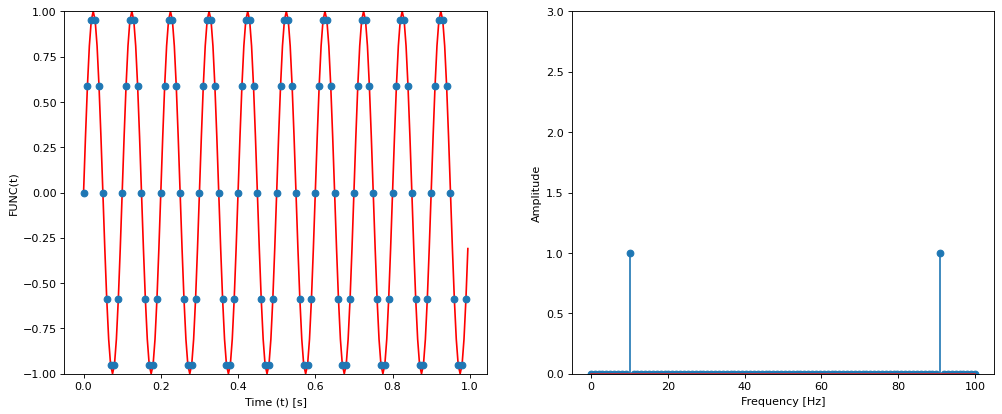

In [18]:
# f=10, w=100, A=1, LP=10
draw_function(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

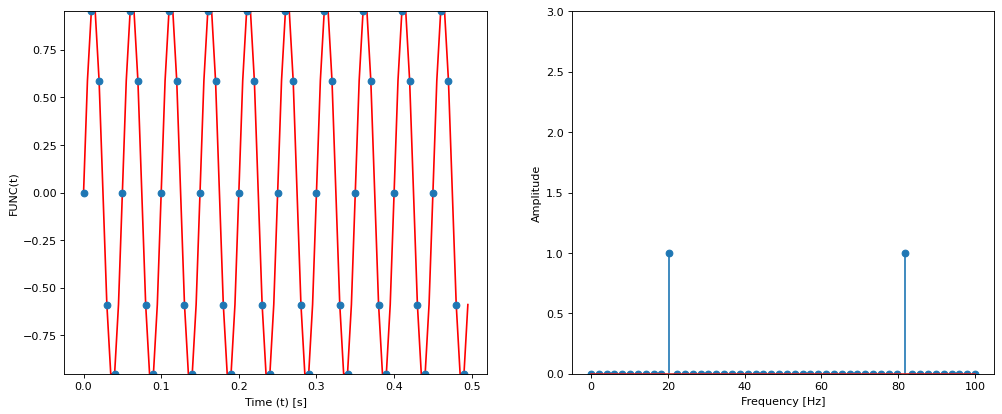

In [19]:
# f=20, w=100, A=1, LP=10
draw_function(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

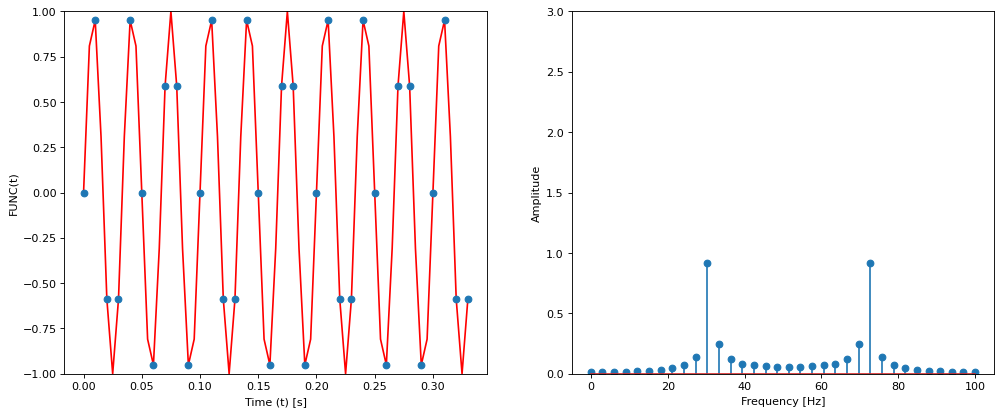

In [20]:
# f=30, w=100, A=1, LP=10
draw_function(f=30, w=100, A=1, LP=10)

##### słupki nie wyglądają idealnie, ponieważ przy takiej częstotliwości próbkowania i częstotliwości sygnału, spróbkowane wartości omijają w niektórych miejscach wartości maksymalne funkcji (amplitudy), przez co wykres spróbkowanych wartości nie wyglądałby jak idealny sinus

iv) $sin(2*pi*t*f)$, $f=40Hz$

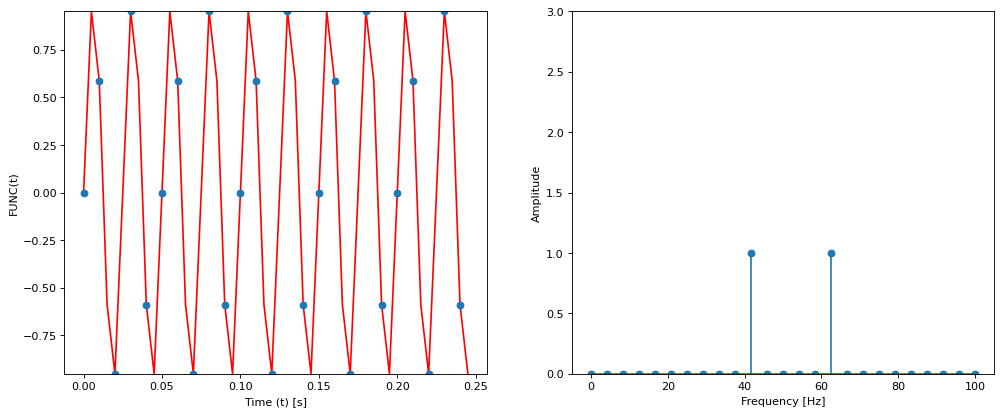

In [21]:
# f=40, w=100, A=1, LP=10
draw_function(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

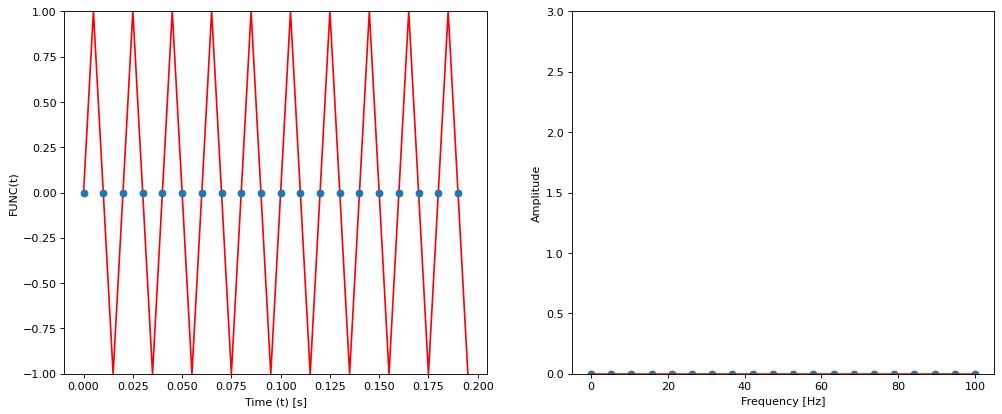

In [22]:
# f=50, w=100, A=1, LP=10
draw_function(f=50, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

##### Twierdzenie Kotielnikowa-Shannona

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

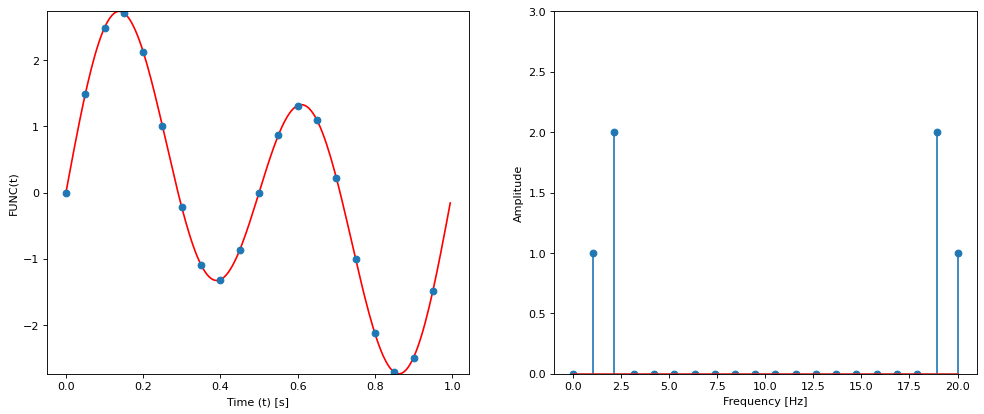

In [23]:
# Wyrysuj sygnał
def draw_any_function(function, A=1, f=2, w=40, LP=1):
    T = 1/f
    TW = 1/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    
    
    signal = function(t, f)
    signal_f = np.abs(np.fft.fft(signal))/(n/2)
    freqs = np.linspace(0, w, n)
    
    base_t = np.arange(0, LP*T, 1/200)
    base_signal = function(base_t, f)
    
    plt.figure(figsize=(15, 6), dpi=80)
    
    plt.subplot(1, 2, 1)
    plt.plot(base_t, base_signal, linestyle='-', color='red')
    plt.plot(t, signal, 'o')
    plt.ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Time (t) [s]')
    plt.ylabel('FUNC(t)')
    
    plt.subplot(1, 2, 2)
    plt.stem(freqs, signal_f, '-*')
    plt.ylim([0, max(3, max(signal_f))])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
    
    plt.show()


draw_any_function(function=lambda _t, _f: np.sin(2*np.pi*_t*_f) + 2*np.sin(4*np.pi*_t*_f), f=1, w=20)

c) Wygenerujemy trochę szumu. Wychodząc z funkcji sin(2*pi*t*f), dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.02, 0.08], częstotliwosci: [5.0, 10.0] oraz modyfikacje fazy[0 + 2*pi]. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*pi*t))? Czy jesteś w stanie zlokalizować szum?

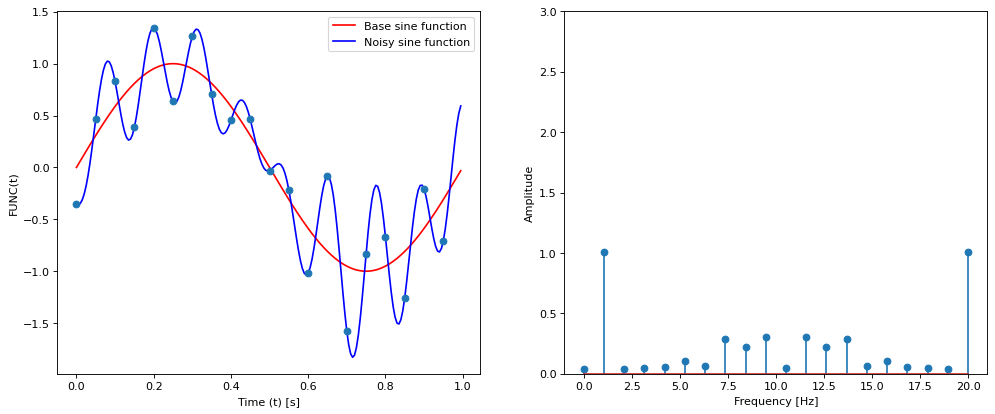

In [24]:
f = 1
w = 20
LP = 1
T = 1/f
TW = 1/w
t = np.arange(0, LP*T, TW)
n = len(t)

clean_func = lambda t: np.sin(2*np.pi*t*f)
signal = clean_func(t)

base_t = np.arange(0, LP*T, 1/200)
base_signal = clean_func(base_t)
signal_smooth = clean_func(base_t)

for _ in range(100):
    A_noise = np.random.uniform(0.02, 0.08)
    f_noise = np.random.uniform(5, 10)
    phi_noise = np.random.uniform(0, 2*np.pi)
    
    noise_func = lambda t: A_noise*np.sin(2*np.pi*t*f_noise + phi_noise)
    noise = noise_func(t)
    signal += noise
    
    noise_smooth = noise_func(base_t)
    signal_smooth += noise_smooth

signal_f = np.abs(np.fft.fft(signal))/(n/2)
freqs = np.linspace(0, w, n)

plt.figure(figsize=(15, 6), dpi=80)

plt.subplot(1, 2, 1)
plt.plot(base_t, base_signal, linestyle='-', color='red')
plt.plot(base_t, signal_smooth, linestyle='-', color='blue')
plt.plot(t, signal, 'o')
plt.xlabel('Time (t) [s]')
plt.ylabel('FUNC(t)')
plt.legend(['Base sine function', 'Noisy sine function'])

plt.subplot(1, 2, 2)
plt.stem(freqs, signal_f, '-*')
plt.ylim([0, max(3, max(signal_f))])
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')

plt.show()

##### Tak, można odnaleźć przebieg funkcji bazowej. Szum to wartości częstotliwości z zakresu <5, 17)Hz

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

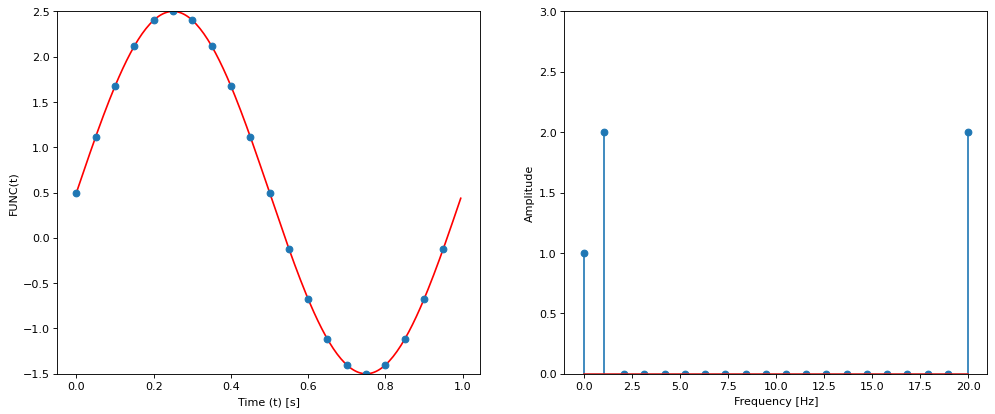

In [28]:
# Wyrysuj sygnał
draw_any_function(function=lambda _t, _f: 0.5 + 2*np.sin(2*np.pi*_t*_f), f=1, w=20)

##### Amplituda zerowego prążka jest prawidłowa, ponieważ przedstawia ona składową stałą przebiegu

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

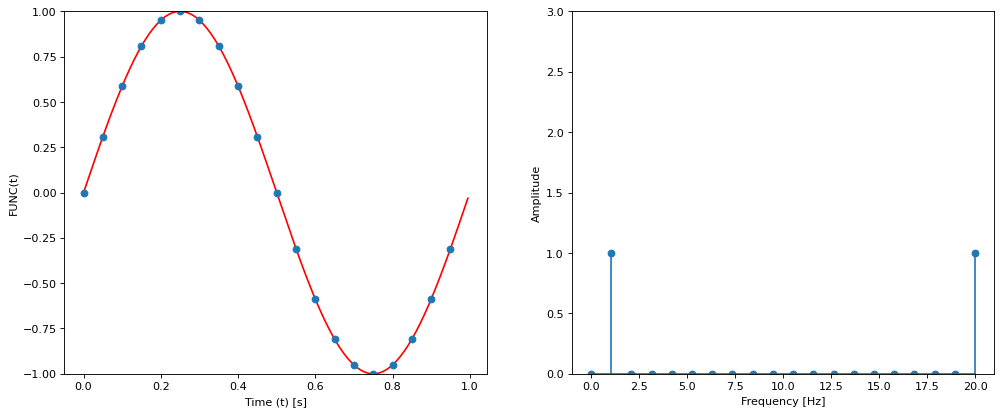

In [31]:
# faza = 0
draw_any_function(function=lambda _t, _f: np.sin(2*np.pi*_t*_f), f=1, w=20)

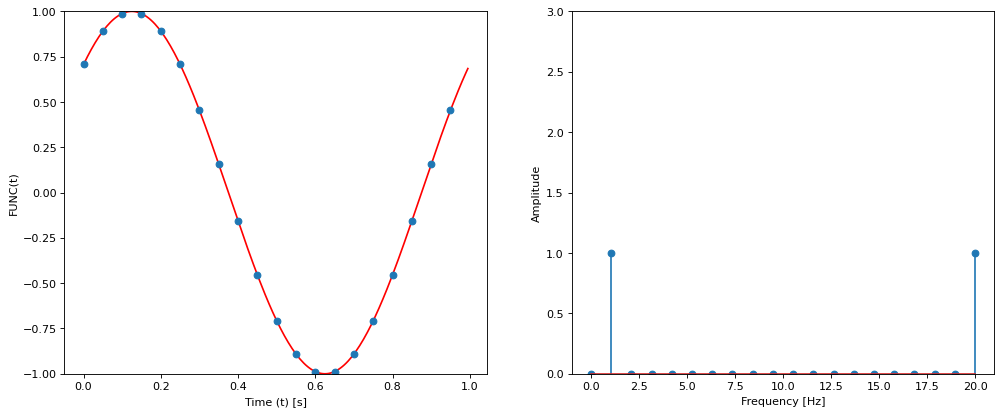

In [32]:
# faza = pi/4
draw_any_function(function=lambda _t, _f: np.sin(2*np.pi*_t*_f + np.pi/4), f=1, w=20)

In [33]:
f = 1
w = 20
LP = 1
T = 1/f
TW = 1/w
t = np.arange(0, LP*T, TW)
n = len(t)

func_3e1=lambda t: np.sin(2*np.pi*t*f)
signal_1 = func_3e1(t)
signal_f1 = np.fft.fft(signal_1)
print(np.angle(signal_f1, deg=True))

func_3e2=lambda t: np.sin(2*np.pi*t*f + np.pi/4)
signal_2 = func_3e2(t)
signal_f2 = np.fft.fft(signal_2)
print(np.angle(signal_f2, deg=True))

[ 180.          -90.          135.70772846 -113.03788129  151.50677798
 -100.2322371   -12.22500628   67.53139063   28.65155221  122.24147373
  180.         -125.25550211  -28.65155221  -57.35019889   12.22500628
  102.32592855 -151.50677798  120.3887088  -135.70772846   90.        ]
[ 180.          -45.          110.93769821  180.         -169.48852767
  -78.01728813   -6.35494711   26.56505118   48.92993357  126.96148855
 -180.         -127.87498365  -48.92993357   25.32446462    6.35494711
   84.80557109  169.48852767 -115.53144089 -110.93769821   45.        ]


##### Informacja o fazie nie zniknęła

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [34]:
# wygeneruj wektor x
x = np.random.random(10)
print(x)

[0.9186357  0.83744052 0.44396195 0.60601782 0.92763326 0.67050386
 0.65654195 0.67446675 0.30634684 0.79368156]


In [35]:
# oblicz fft z x
x_fft = np.fft.fft(x)
x_fft

array([ 6.8352302 +0.00000000e+00j,  0.12227933-2.50845294e-01j,
        0.93977473+9.50845172e-02j,  0.66254567-2.58785544e-01j,
       -0.38454095+3.29601153e-01j, -0.32899081-2.77555756e-17j,
       -0.38454095-3.29601153e-01j,  0.66254567+2.58785544e-01j,
        0.93977473-9.50845172e-02j,  0.12227933+2.50845294e-01j])

In [36]:
# oblicz ifft
x_ifft = np.fft.ifft(x_fft)
x_ifft

array([0.9186357 -8.32667268e-18j, 0.83744052+2.77555756e-18j,
       0.44396195-2.90281605e-17j, 0.60601782-1.69330980e-17j,
       0.92763326+2.57765575e-17j, 0.67050386+3.38307691e-18j,
       0.65654195-9.93310895e-18j, 0.67446675+2.69933797e-17j,
       0.30634684+7.63359677e-18j, 0.79368156-2.34112839e-18j])

In [37]:
#porownaj x z ifft(fft(x)), wystarczy print
print(x)
print(x_ifft)

[0.9186357  0.83744052 0.44396195 0.60601782 0.92763326 0.67050386
 0.65654195 0.67446675 0.30634684 0.79368156]
[0.9186357 -8.32667268e-18j 0.83744052+2.77555756e-18j
 0.44396195-2.90281605e-17j 0.60601782-1.69330980e-17j
 0.92763326+2.57765575e-17j 0.67050386+3.38307691e-18j
 0.65654195-9.93310895e-18j 0.67446675+2.69933797e-17j
 0.30634684+7.63359677e-18j 0.79368156-2.34112839e-18j]


In [38]:
x - np.real(x_ifft)

array([-2.22044605e-16, -1.11022302e-16,  0.00000000e+00, -1.11022302e-16,
        0.00000000e+00, -1.11022302e-16, -1.11022302e-16,  0.00000000e+00,
        0.00000000e+00, -1.11022302e-16])

##### Żadna informacja nie została stracona, różnice rzędu e-16 / e-17 wynikają najprawdopodobniej z dokładności liczb zmiennoprzecinkowych w komputerze